In [56]:
import math
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

# Tarefa - Redes Aleatórias
## PCC121 - Redes Complexas
Aluno: Gabriel F. Costa

# Questão 1

## a)

$$N = 3000 \ \text{nós}$$

$$p = 0.001$$

Para uma rede **ER** $G(N, p)$:

$$\langle L \rangle = p \frac{N(N - 1)}{2}$$

$$\langle L \rangle = 0.001 \cdot \frac{3000 \cdot 2999}{2} = 10^{-3} \cdot 4498500 = 4498.5 \ \text{arestas}$$

In [64]:
# %% ------------------------------------------------------------
# Redes aleatórias
# %% ------------------------------------------------------------

N = 3000
p = 0.001

# Criar a rede ER
G = nx.erdos_renyi_graph(N, p)

# Número de arestas observadas
links = G.number_of_edges()
print("Número de arestas:", links)

Número de arestas: 4489


## b)

In [65]:
# Componentes conexos
components = list(nx.connected_components(G))

# Tamanho do maior componente
largest_component_size = max(len(c) for c in components)
print("Tamanho do maior componente:", largest_component_size)

# Fração N_G / N
NG_div_N = largest_component_size / N
print("N_G / N:", NG_div_N)

Tamanho do maior componente: 2825
N_G / N: 0.9416666666666667


Ou seja, $\approx 94\%$ dos nós pertencem ao componente gigante, confirmando que a rede está no **regime supercrítico** ($\langle k\rangle > 1$). Nesse regime, uma fração finita dos nós forma um grande aglomerado conectado, enquanto o restante se distribui em pequenos componentes ou permanece isolado.


# Questão 2

## a)

$$N = 300\ \text{nós}$$
$$L = 900\ \text{arestas}$$

Para uma rede $G(N, p)$:

$$p = \frac{2L}{N(N-1)} = \frac{2 \cdot 900}{300 \cdot 299} \approx 0.02006689$$

$$\therefore \langle k \rangle_{\text{analítico}} = p(N-1) \approx 6$$

In [66]:
# %% ------------------------------------------------------------
# ER G(N, p): média de grau <k> e de arestas <L> via simulação
# e comparação com a análise
# --------------------------------------------------------------

# Parâmetros desejados
N = 300              # número de nós da rede
L_target = 900       # número esperado de arestas (valor alvo analítico)
trials = 1000        # número de repetições (quantas redes serão geradas para calcular as médias)

# p calculado a partir de N e L = p * C(N,2)
p = 2 * L_target / (N * (N - 1))
# probabilidade de conexão entre pares de nós, obtida isolando p na fórmula:
# L = p * C(N,2), onde C(N,2) = N(N-1)/2 é o número de pares possíveis

# Valores analíticos
M = N * (N - 1) // 2              # número total de pares de nós possíveis (arestas potenciais)
k_mean_analit = p * (N - 1)       # valor esperado do grau médio <k>
L_mean_analit = p * M             # valor esperado do número de arestas <L> (deve ser 900)
k_std_analit  = math.sqrt((N - 1) * p * (1 - p))  # desvio-padrão teórico do grau
L_std_analit  = math.sqrt(M * p * (1 - p))        # desvio-padrão teórico do número de arestas

# Simulação
L_obs = []   # lista para armazenar o número de arestas observado em cada simulação
k_obs = []   # lista para armazenar o grau médio observado em cada simulação

rng = np.random.default_rng(42)   # gerador de números aleatórios com semente fixa para reprodutibilidade
for _ in range(trials):           # repete o experimento 'trials' vezes
    # networkx usa o gerador global do Python; aqui passamos uma semente diferente a cada iteração
    G = nx.erdos_renyi_graph(N, p, seed=int(rng.integers(0, 1 << 31)))

    # número de arestas observado nessa rede
    L_now = G.number_of_edges()
    L_obs.append(L_now)  # guarda o valor na lista

    # grau médio observado; pela fórmula <k> = 2L / N
    k_now = 2 * L_now / N
    k_obs.append(k_now)  # guarda o valor na lista

# Estatísticas empíricas (médias e desvios a partir das simulações)
k_mean_sim = float(np.mean(k_obs))             # média do grau médio observado
k_std_sim  = float(np.std(k_obs, ddof=1))      # desvio-padrão do grau médio observado
L_mean_sim = float(np.mean(L_obs))             # média do número de arestas observado
L_std_sim  = float(np.std(L_obs, ddof=1))      # desvio-padrão do número de arestas observado

# Relatório
print(f"N = {N}, L alvo = {L_target}, p calculado = {p:.9f}")
print(f"Número de trials: {trials}")
print()
print("---- Analítico ----")
print(f"<k> = {k_mean_analit:.6f} (std ≈ {k_std_analit:.6f})")
print(f"<L> = {L_mean_analit:.6f} (std ≈ {L_std_analit:.6f})")
print("---- Simulado -----")
print(f"<k> = {k_mean_sim:.6f} (std ≈ {k_std_sim:.6f})")
print(f"<L> = {L_mean_sim:.6f} (std ≈ {L_std_sim:.6f})")

# Checagem de proximidade
print("\nDiferenças abs(simulado - analítico):")
print(f"|Δ<k>| = {abs(k_mean_sim - k_mean_analit):.6f}")
print(f"|Δ<L>| = {abs(L_mean_sim - L_mean_analit):.6f}")

N = 300, L alvo = 900, p calculado = 0.020066890
Número de trials: 1000

---- Analítico ----
<k> = 6.000000 (std ≈ 2.424788)
<L> = 900.000000 (std ≈ 29.697471)
---- Simulado -----
<k> = 5.995840 (std ≈ 0.201980)
<L> = 899.376000 (std ≈ 30.297071)

Diferenças abs(simulado - analítico):
|Δ<k>| = 0.004160
|Δ<L>| = 0.624000


**Valores analíticos esperados**

* $\langle k\rangle_{\text{analytical}} = 6$.
* $\langle L\rangle_{\text{analytical}} = 900$.
* Desvios teóricos: $\sigma_k \approx 2.4248$, $\sigma_L \approx 29.6975$.

**Resultados da simulação (1000 tentativas)**

* $\langle k\rangle_{\text{sim}} = 5.99584$ (std empírica ≈ 0.20198).
* $\langle L\rangle_{\text{sim}} = 899.376$ (std empírica ≈ 30.29707).

**Comparação e conclusão**

* Diferenças absolutas: $|\Delta\langle k\rangle| \approx 0.00416$, $|\Delta\langle L\rangle| \approx 0.624$.
* Os resultados simulados concordam muito bem com os valores analíticos dentro da flutuação estatística esperada.
* **Conclusão:** a simulação valida a previsão analítica para $G(N,p)$ com os parâmetros escolhidos.


## b)

Iremos baixar a **Rede de Transmissão Elétrica** que foi upada no repositório da disciplina ([Complex Networks](https://github.com/gabrielxcosta/PCC121---Complex-Networks/tree/main)) no meu *GitHub*.

In [68]:
!wget https://media.githubusercontent.com/media/gabrielxcosta/PCC121---Complex-Networks/refs/heads/main/Datasets/powergrid.edgelist.txt

--2025-09-15 19:03:48--  https://media.githubusercontent.com/media/gabrielxcosta/PCC121---Complex-Networks/refs/heads/main/Datasets/powergrid.edgelist.txt
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63006 (62K) [text/plain]
Saving to: ‘powergrid.edgelist.txt’

powergrid.edgelist. 100%[===================>]  61.53K  --.-KB/s    in 0.02s   

2025-09-15 19:03:48 (2.52 MB/s) - ‘powergrid.edgelist.txt’ saved [63006/63006]



Rede real: N = 4941, L = 6594
Rede real -> Grau mínimo: 1, Grau máximo: 19
Rede ER -> Grau mínimo médio: 0.00, Grau máximo médio: 10.58


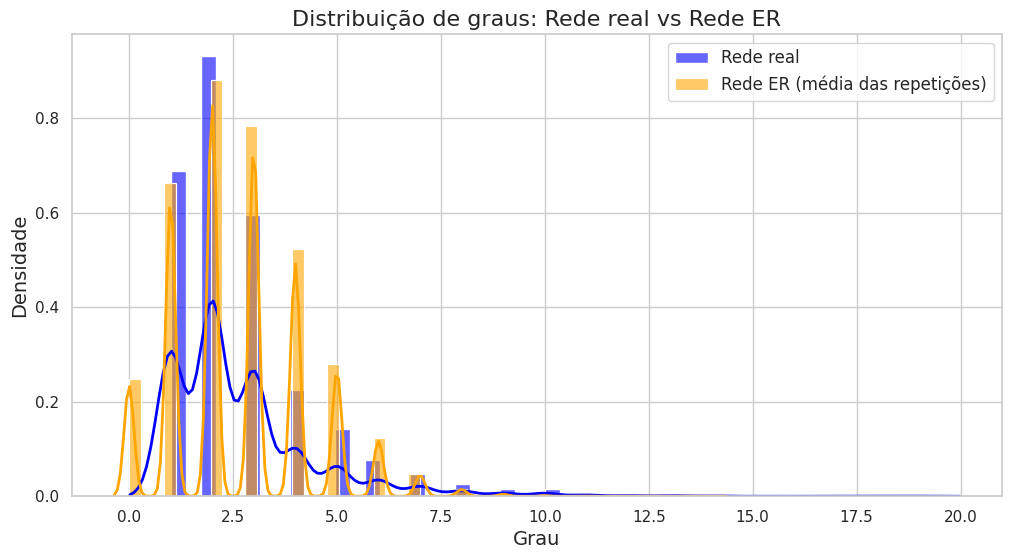

In [70]:
# Configura o estilo do seaborn para fundo branco com grid
sns.set(style="whitegrid")

# Carrega a rede real a partir de um arquivo de edgelist
G_real = nx.read_edgelist('/content/powergrid.edgelist.txt')

# Obtém número de nós (N) e arestas (L) da rede real
N = G_real.number_of_nodes()
L = G_real.number_of_edges()
print(f"Rede real: N = {N}, L = {L}")

# Extrai a lista de graus dos nós da rede real
degrees_real = [d for _, d in G_real.degree()]
print(f"Rede real -> Grau mínimo: {min(degrees_real)}, Grau máximo: {max(degrees_real)}")

# Função que gera uma rede Erdős–Rényi G(N,p) com N nós e aproximadamente L arestas
def generate_ER(N, L):
    p = (2 * L) / (N * (N - 1))  # Probabilidade de cada aresta existir
    G_er = nx.erdos_renyi_graph(N, p)  # Gera a rede ER
    degrees = [d for _, d in G_er.degree()]  # Obtém graus dos nós da rede ER
    return degrees, G_er

# Repetições para calcular o caso médio da rede ER (rede aleatória)
trials = 100
degrees_er_all = []  # Lista para acumular todos os graus das 100 repetições
min_degree_er = []   # Lista para armazenar grau mínimo de cada repetição
max_degree_er = []   # Lista para armazenar grau máximo de cada repetição

for _ in range(trials):
    degrees_er, _ = generate_ER(N, L)
    degrees_er_all.extend(degrees_er)         # Acumula todos os graus
    min_degree_er.append(min(degrees_er))     # Armazena mínimo da repetição
    max_degree_er.append(max(degrees_er))     # Armazena máximo da repetição

# Calcula e imprime grau mínimo e máximo médio da rede ER
print(f"Rede ER -> Grau mínimo médio: {np.mean(min_degree_er):.2f}, "
      f"Grau máximo médio: {np.mean(max_degree_er):.2f}")

# Plot das distribuições
plt.figure(figsize=(12,6))

# Histograma + KDE da rede real
sns.histplot(degrees_real, bins=50, color='blue', alpha=0.6, stat="density", label="Rede real")
sns.kdeplot(degrees_real, color='blue', linewidth=2)

# Histograma + KDE da rede ER (acumulado de várias repetições)
sns.histplot(degrees_er_all, bins=50, color='orange', alpha=0.6, stat="density", label="Rede ER (média das repetições)")
sns.kdeplot(degrees_er_all, color='orange', linewidth=2)

# Ajustes de labels e título do gráfico
plt.xlabel("Grau", fontsize=14)
plt.ylabel("Densidade", fontsize=14)
plt.title("Distribuição de graus: Rede real vs Rede ER", fontsize=16)
plt.legend(fontsize=12)
plt.show()

A rede real utilizada (*powergrid.edgelist.txt*) possui **4941 nós** e **6594 arestas**, apresentando grau mínimo igual a 1 e grau máximo igual a 19. Já a rede *Erdős–Rényi* G(N,L), gerada de forma a ter o mesmo número de nós e arestas e considerando a média de 100 repetições, apresentou grau mínimo médio igual a 0,00 e grau máximo médio de aproximadamente 10,58. A análise das distribuições mostra que a rede real apresenta maior **heterogeneidade estrutural**, com nós de maior conectividade e uma cauda mais alongada na distribuição de graus, enquanto a rede ER exibe uma distribuição mais concentrada em torno da média, típica de processos aleatórios binomiais ou Poisson. Assim, embora possuam o mesmo número de nós e arestas, a rede real não segue o comportamento puramente aleatório da rede ER, evidenciando propriedades estruturais próprias que não são capturadas por esse modelo.
